## QC of Ingestion 

In [33]:
# Configure plots for inline use in Jupyter Notebook
%matplotlib inline

import datetime as dt

# Utilities
import boto3
import dateutil
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import rasterio
import rasterio.mask
from rasterio.plot import show_hist
from rasterio.plot import show
import random
import fiona
import numpy as np
from shapely.geometry import mapping, Polygon
from shapely import geometry



# Sentinel Hub
from sentinelhub import (
    CRS,
    BBox,
    ByocCollection,
    ByocCollectionAdditionalData,
    ByocCollectionBand,
    ByocTile,
    DataCollection,
    DownloadFailedException,
    MimeType,
    SentinelHubBYOC,
    SentinelHubRequest,
    SHConfig,
    bbox_to_dimensions,
    os_utils,
)

config = SHConfig()
config.instance_id = os.environ.get("SH_INSTANCE_ID")
config.sh_client_id = os.environ.get("SH_CLIENT_ID")
config.sh_client_secret = os.environ.get("SH_CLIENT_SECRET")
config.aws_access_key_id = os.environ.get("username")
config.aws_secret_access_key = os.environ.get("password")
    
print ("done")
    

done


./../../../s3/data/d002_urban_atlas
following raster is selected for QC:
3089958
3283848
POLYGON ((3203796 3458860, 3203796 3459860, 3204796 3459860, 3204796 3458860, 3203796 3458860))
[[[65535 23000 23000 ... 23000 23000 23000]
  [65535 23000 23000 ... 23000 23000 23000]
  [65535 23000 23000 ... 23000 23000 23000]
  ...
  [65535 23000 23000 ... 23000 23000 23000]
  [65535 23000 23000 ... 23000 23000 23000]
  [65535 23000 23000 ... 23000 23000 23000]]]


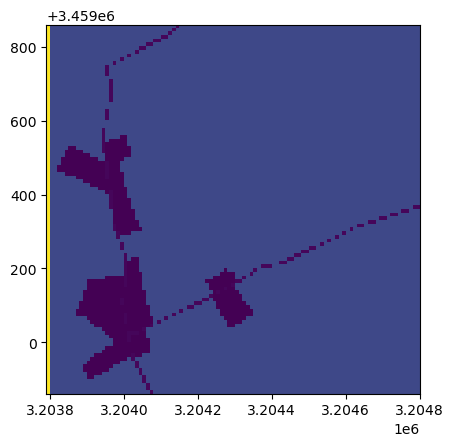

Raster info:....................
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 101, 'height': 100, 'count': 1, 'crs': CRS.from_epsg(3035), 'transform': Affine(10.0, 0.0, 3203790.0,
       0.0, -10.0, 3459860.0), 'blockysize': 40, 'tiled': False, 'interleave': 'band'}
Raster Histogramm:....................
Count of pixel values:..........
[[11210   162]
 [11220   233]
 [11230   102]
 [11240    97]
 [11300   100]
 [12220   131]
 [23000  9175]
 [65535   100]]
Pixel max: '65535
Pixel min'11210
add. RASTER info.............................................:..........
./../../../s3/data/d002_urban_atlas/aoi/aoi.tif
1
101
100
BoundingBox(left=3203790.0, bottom=3458860.0, right=3204800.0, top=3459860.0)
| 10.00, 0.00, 3203790.00|
| 0.00,-10.00, 3459860.00|
| 0.00, 0.00, 1.00|
-----------------
10.0 pixel size x
10.0 pixel size y
EPSG:3035
-----------------
3203790.0  left
3458860.0  bottom
3204800.0  right
3459860.0  top
end


In [65]:
# Read raster files on S3 drive


#https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html#Create-new-collection


input_folder ="./../../../s3/data/d002_urban_atlas"
aoi_folder ="./../../../s3/data/d002_urban_atlas/aoi"

##./../../../s3/data/d001_administration/nuts_2021

test_raster = "./../../../s3/data/d002_urban_atlas/ua2018_mosaic_raster_10m_cog_2_2_B1.tif"


# assign directory
directory = input_folder
print (directory)
print ("following raster is selected for QC:")

raster_list=[]
# iterate over files in
# that directory
for filename in os.scandir(directory):
    if filename.is_file():
        #print(filename.path)
        raster_list.append(filename.path)
             
        
## PART 1 select randomly one raster: ----------------------------------    
#print (raster_list)
raster_for_qc = random.choice(raster_list)
#print(raster_for_qc)

## PART 1 b read raster: ----------------------------------   
raster_for_qc=test_raster############################################################################################# for testing
raster = rasterio.open(raster_for_qc)



#raster = rasterio.open(test_raster)

#https://rasterio.readthedocs.io/en/stable/quickstart.html
raster_name = raster.name
raster_bands = raster.count
raster_width= raster.width
raster_height= raster.height
raster_bounds= raster.bounds

left = raster_bounds[0]
bottom = raster_bounds[1]
right = raster_bounds[2]
top = raster_bounds[3]

raster_transform =raster.transform
pixelSizeX = raster_transform[0]
pixelSizeY =-raster_transform[4]
raster_crs =raster.crs
# print raster information:
# print (raster_name)
# print ('================')
# print (raster_bands)
# print (raster_width)
# print (raster_height)
# print (raster_bounds)
# print (raster_transform)
# print ('-----------------')
# print (str(pixelSizeX) +' pixel size x')
# print (str(pixelSizeY) +' pixel size y')
# print (raster_crs)
# print ('-----------------')
# print (str(left)+'  left')
# print (str(bottom)+'  bottom')
# print (str(right)+'  right')
# print (str(top)+'  top')


# build random aoi:--------------------------------------
random__y = random.randrange(bottom,top)
random__x = random.randrange(left,right)
print (random__x)
print (random__y)
aoi_left= random__y
aoi_buttom=random__x
aoi_right=random__y +1000
aoi_top=random__x+1000

fixed_center_coordinate_x = 3024866  #  North of Frankfurt
fixed_center_coordinate_y =4201149

##3458860,3203796 : 3491673,3249116 ## test extent for ua2018_mosaic_raster_10m_cog_2_2_B1
fixed_center_coordinate_x = 3458860  # ua2018_mosaic_raster_10m_cog_2_2_B1
fixed_center_coordinate_y =3203796

aoi_left= fixed_center_coordinate_y
aoi_buttom=fixed_center_coordinate_x
aoi_right=fixed_center_coordinate_y +1000
aoi_top=fixed_center_coordinate_x+1000
#https://stackoverflow.com/questions/30457089/how-to-create-a-shapely-polygon-from-a-list-of-shapely-points
p1 = geometry.Point(aoi_left,aoi_buttom) # 0-0
p2 = geometry.Point(aoi_left,aoi_top)  # 1 0

p3 = geometry.Point(aoi_right,aoi_top)
p4 = geometry.Point(aoi_right,aoi_buttom)
pointList = [p1, p2, p3, p4, p1]                    
poly = geometry.Polygon([[p.x, p.y] for p in pointList])
print(poly.wkt) 

# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
    }
# Write a new Shapefile
with fiona.open(aoi_folder+'/'+ 'aoi.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(poly),
        'properties': {'id': 123},
    })


###testing aoi

with fiona.open(aoi_folder+'/'+ 'aoi.shp', "r") as shapefile:
     shapes = [feature["geometry"] for feature in shapefile]


with rasterio.open(raster_for_qc) as src:
     out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
     out_meta = src.meta


print (out_image)


out_meta.update({"driver": "GTiff",
                  "height": out_image.shape[1],
                  "width": out_image.shape[2],
                  "transform": out_transform})
output_raster = aoi_folder+"/aoi.tif"

with rasterio.open(output_raster, "w", **out_meta) as dest:
    dest.write(out_image)


# Plot / show band 1--------------------------------------------------------------START QC of AOI RASTER:
raster_show = rasterio.open(output_raster)
show((raster_show, 1))    
print ("Raster info:....................")
print(raster_show.profile)
print ("Raster Histogramm:....................")
band1 = raster_show.read(1)
#print(band1)
#uniq_vals = np.unique(band1)
#print(sorted(uniq_vals))
print ("Count of pixel values:..........")
unique, counts = np.unique(band1, return_counts=True)
print(np.asarray((unique, counts)).T)

pixel_max = np.max(band1)
print ("Pixel max: '" + str(pixel_max))
pixel_min = np.min(band1)
print ("Pixel min'" + str(pixel_min))





#############
print ("add. RASTER info.............................................:..........")
raster = raster_show
raster_name = raster.name
raster_bands = raster.count
raster_width= raster.width
raster_height= raster.height
raster_bounds= raster.bounds

left = raster_bounds[0]
bottom = raster_bounds[1]
right = raster_bounds[2]
top = raster_bounds[3]

raster_transform =raster.transform
pixelSizeX = raster_transform[0]
pixelSizeY =-raster_transform[4]
raster_crs =raster.crs
# print raster information:
print (raster_name)
print ('================')
print (raster_bands)
print (raster_width)
print (raster_height)
print (raster_bounds)
print (raster_transform)
print ('-----------------')
print (str(pixelSizeX) +' pixel size x')
print (str(pixelSizeY) +' pixel size y')
print (raster_crs)
print ('-----------------')
print (str(left)+'  left')
print (str(bottom)+'  bottom')
print (str(right)+'  right')
print (str(top)+'  top')


print ("end")


In [66]:
#xx error hello world
##for collection in my_collections:   
 # byoc.delete_collection(collection)
#print ("end")